In [1]:
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import numpy as np

In [2]:
energy_df = pd.read_csv('energy_data.csv')
fin_df = pd.read_csv('fin_data.csv')
mater_df = pd.read_csv('mater_data.csv')
cons_stap_df = pd.read_csv('cons_stap_data.csv')
indust_df = pd.read_csv('indust_data.csv')
comms_df = pd.read_csv('comms_data.csv')
real_df = pd.read_csv('real_data.csv')
tech_df = pd.read_csv('tech_data.csv')
util_df = pd.read_csv('util_data.csv')
cons_disc_df = pd.read_csv('cons_disc_data.csv')
health_df = pd.read_csv('health_data.csv')

energy_p = energy_df.pivot(index='date', columns='symbol', values='close')
fin_p = fin_df.pivot(index='date', columns='symbol', values='close')
mater_p = mater_df.pivot(index='date', columns='symbol', values='close')
util_p = util_df.pivot(index='date', columns='symbol', values='close')
cons_stap_p = cons_stap_df.pivot(index='date', columns='symbol', values='close')
cons_disc_p = cons_disc_df.pivot(index='date', columns='symbol', values='close')
tech_p = tech_df.pivot(index='date', columns='symbol', values='close')
real_p = real_df.pivot(index='date', columns='symbol', values='close')
comms_p = comms_df.pivot(index='date', columns='symbol', values='close')
indus_p = indust_df.pivot(index='date', columns='symbol', values='close')
health_p = health_df.pivot(index='date', columns='symbol', values='close')

energy_r = pd.read_csv('energy_returns.csv')
mater_r = pd.read_csv('mater_returns.csv')
fin_r = pd.read_csv('fin_returns.csv')
cons_stap_r = pd.read_csv('cons_stap_returns.csv')
indust_r = pd.read_csv('indust_returns.csv')
comms_r = pd.read_csv('comms_returns.csv')
real_r = pd.read_csv('real_returns.csv')
tech_r = pd.read_csv('tech_returns.csv')
util_r = pd.read_csv('util_returns.csv')
cons_disc_r = pd.read_csv('cons_disc_returns.csv')
health_r = pd.read_csv('health_returns.csv')

stock_r = pd.read_csv('stock_returns.csv')
stock_p = pd.read_csv('stock_prices.csv')

stocks_df = pd.read_csv('stocks_data.csv')

## Find max sharpe portfolio and min volatility portfolio for each sector. Client can decide whcih sectors they want to invest, but my findings show how to allocate portfolios within sectors. 

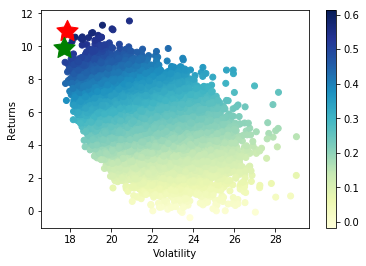

In [6]:
mater_stocks = list(mater_p.columns)
#convert daily stock prices into daily returns
returns = (mater_p.pct_change())*100

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(mater_stocks)-1,num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(10))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = str(weights[j]*100)[:4]
 
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',mater_stocks[0],mater_stocks[1],mater_stocks[2],mater_stocks[3],mater_stocks[4],mater_stocks[5],mater_stocks[6],mater_stocks[7],mater_stocks[8],mater_stocks[9]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
 
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='YlGnBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)


In [7]:
mater_sharpe=pd.DataFrame(max_sharpe_port)
mater_sharpe.columns = ['Materials % Allocation']
mater_vol = pd.DataFrame(min_vol_port)
mater_vol.columns = ['Materials % Allocation']
mater_sharpe.to_csv('mater_sharpe.csv')
mater_vol.to_csv('mater_vol.csv')

## Outline 
Go over sharpe ratio and volatility and present findings

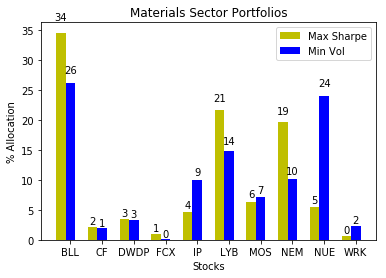

In [10]:
mater_sharpe=pd.read_csv('mater_sharpe.csv')
mater_vol=pd.read_csv('mater_vol.csv')

mater_vol.columns=['Portfolio Characteristics','% Allocation']
mater_vol.set_index('Portfolio Characteristics', inplace=True)
mater_sharpe.columns=['Portfolio Characteristics','% Allocation']
mater_sharpe.set_index('Portfolio Characteristics', inplace=True)

hs=mater_sharpe.index[3:13]
hs=list(hs)
sharpe_values=mater_sharpe['% Allocation'][3:13]
sharpe_values = list(sharpe_values)
vol_values=mater_vol["% Allocation"][3:13]
vol_values=list(vol_values)

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = sharpe_values
rects1 = ax.bar(ind, yvals, width, color='y')
zvals = vol_values
rects2 = ax.bar(ind+width, zvals, width, color='b')

ax.set_ylabel('% Allocation')
ax.set_xlabel('Stocks')
ax.set_xticks(ind+width)
ax.set_xticklabels( (hs) )
ax.legend( (rects1[0], rects2[0]), ('Max Sharpe', 'Min Vol'), loc='upper right')
ax.set_title('Materials Sector Portfolios', loc='center')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()